In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
from pathlib import Path
import random
import string
import os
import glob
import pickle as pkl
from autocorr_functions import *
import autocorr_cmls as accml

In [12]:
from pyproj import Proj, transform
import scipy.stats as stats
import sys
from pathlib import Path
# sys.path.append("../Iterative/")
# sys.path.append("../Kriging/")
sys.path.append("/home/adameshel/Documents/code/my_functions/")
from geoFunc import *
from analysis_funcs import *
import iterative_IDW_V1 as gmz
import kriging as krg
sys.path.append("/home/adameshel/Documents/code/") 
from helper_functions import *

In [21]:
my_path = Path('/home/adameshel/Documents/code/autocorr/semi_real/main_with_gamma/')
fig_path_current = my_path.joinpath('figures')
fig_path = Path('/home/adameshel/Documents/code/autocorr/figures/')

In [22]:
dir_paths = glob.glob(str(my_path.absolute()) + '/*/')
idxs = []
i = 0
for p in dir_paths:
    if '_cod' not in p:
        idxs.append(i)
    if '60T_ts29' in p:
        idxs.append(i)
    i+=1
dir_paths = delete_from_list(dir_paths,idxs)
dir_paths

['/home/adameshel/Documents/code/autocorr/semi_real/main_with_gamma/30T_ts49_cod110optTrue_identicalFalse_mult20_DzerosFalse_U/',
 '/home/adameshel/Documents/code/autocorr/semi_real/main_with_gamma/30T_ts11_cod110optTrue_identicalFalse_mult20_DzerosFalse_U/',
 '/home/adameshel/Documents/code/autocorr/semi_real/main_with_gamma/5T_ts394_cod60optTrue_identicalFalse_mult20_DzerosFalse_U/',
 '/home/adameshel/Documents/code/autocorr/semi_real/main_with_gamma/30T_ts26_cod110optTrue_identicalFalse_mult20_DzerosFalse_U/',
 '/home/adameshel/Documents/code/autocorr/semi_real/main_with_gamma/30T_ts49_cod110optTrue_identicalTrue_mult20_DzerosFalse_N/',
 '/home/adameshel/Documents/code/autocorr/semi_real/main_with_gamma/5T_ts360_cod50optTrue_identicalTrue_mult20_DzerosFalse_N/',
 '/home/adameshel/Documents/code/autocorr/semi_real/main_with_gamma/30T_ts11_cod110optTrue_identicalTrue_mult20_DzerosFalse_N/',
 '/home/adameshel/Documents/code/autocorr/semi_real/main_with_gamma/5T_ts360_cod50optTrue_ident

/home/adameshel/Documents/code/autocorr/semi_real/main_with_gamma/30T_ts49_cod110optTrue_identicalFalse_mult20_DzerosFalse_U/
(50, 20)
/home/adameshel/Documents/code/autocorr/radar_autocorr_snaps/with_gamma/30T_ts49_cod110_mult20_DzerosFalse
5.578024930543335 1.7323301628369372 0.4930382289899895
/home/adameshel/Documents/code/autocorr/semi_real/main_with_gamma/30T_ts11_cod110optTrue_identicalFalse_mult20_DzerosFalse_U/
(50, 20)
/home/adameshel/Documents/code/autocorr/radar_autocorr_snaps/with_gamma/30T_ts11_cod110_mult20_DzerosFalse
30.252937979349433 10.432994633349592 1.2067895247207485
/home/adameshel/Documents/code/autocorr/semi_real/main_with_gamma/5T_ts394_cod60optTrue_identicalFalse_mult20_DzerosFalse_U/
(50, 20)
/home/adameshel/Documents/code/autocorr/radar_autocorr_snaps/with_gamma/5T_ts394_cod60_mult20_DzerosFalse
16.193093959552588 5.23193216432139 1.2494221548781874
/home/adameshel/Documents/code/autocorr/semi_real/main_with_gamma/30T_ts26_cod110optTrue_identicalFalse_mult

/home/adameshel/anaconda3/envs/cml_env/lib/python3.7/site-packages/ipykernel_launcher.py:68: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/home/adameshel/Documents/code/autocorr/radar_autocorr_snaps/with_gamma/30T_ts14_cod110_mult20_DzerosFalse
19.464947603294576 10.200866316353048 0.7068916456314003
/home/adameshel/Documents/code/autocorr/semi_real/main_with_gamma/30T_ts14_cod110optTrue_identicalFalse_mult20_DzerosFalse_U/
(50, 20)


/home/adameshel/anaconda3/envs/cml_env/lib/python3.7/site-packages/ipykernel_launcher.py:198: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/adameshel/anaconda3/envs/cml_env/lib/python3.7/site-packages/ipykernel_launcher.py:68: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/home/adameshel/Documents/code/autocorr/radar_autocorr_snaps/with_gamma/30T_ts14_cod110_mult20_DzerosFalse
19.464947603294576 10.200866316353048 0.7068916456314003


/home/adameshel/anaconda3/envs/cml_env/lib/python3.7/site-packages/ipykernel_launcher.py:198: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


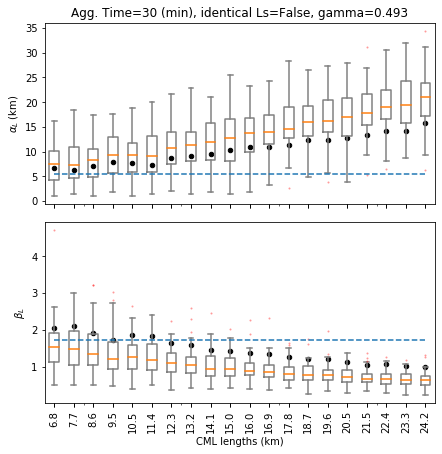

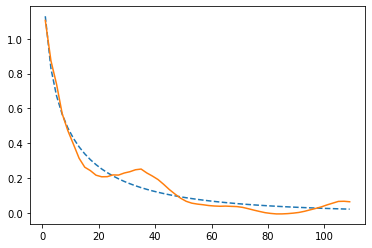

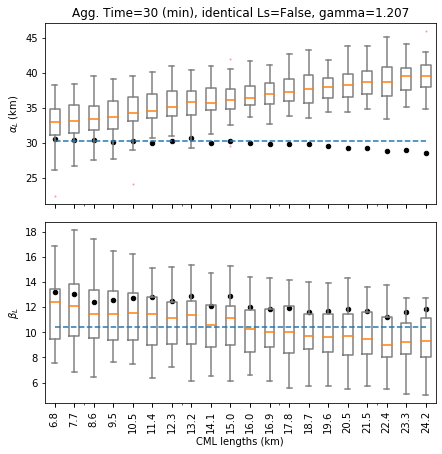

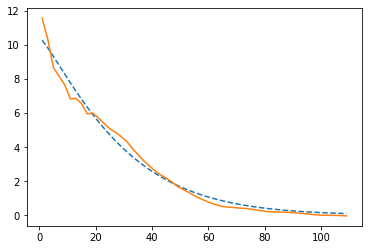

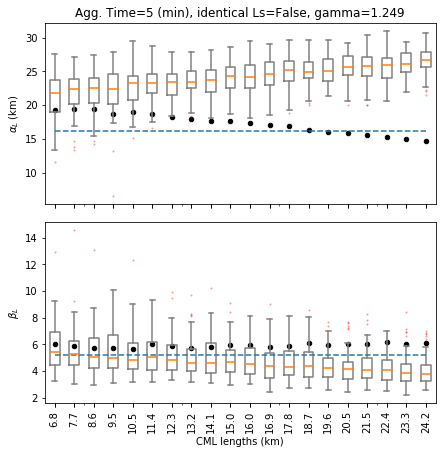

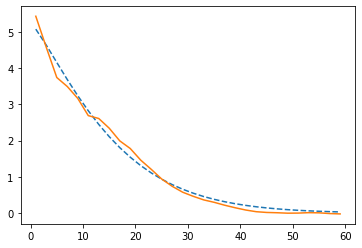

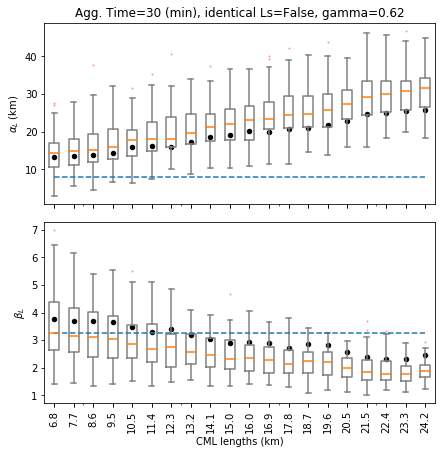

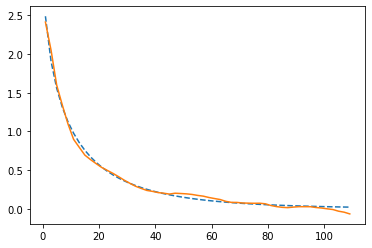

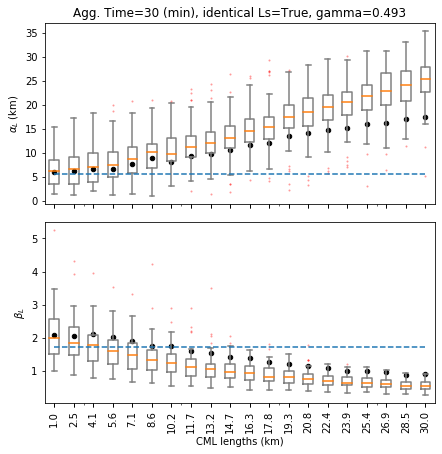

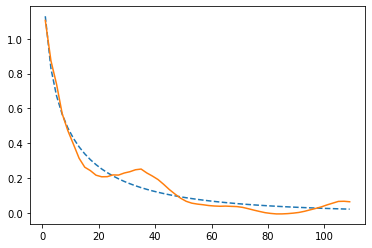

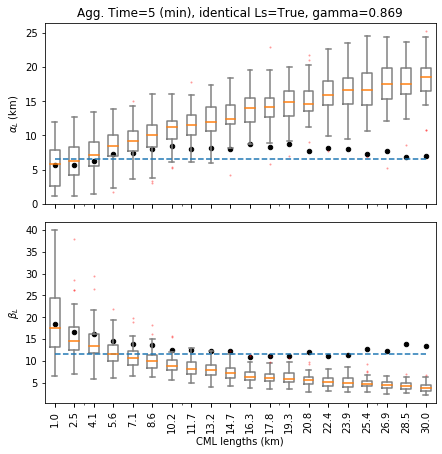

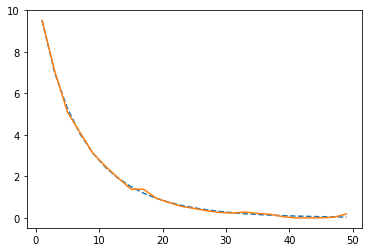

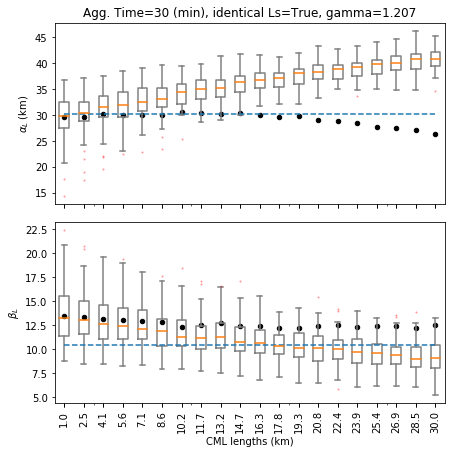

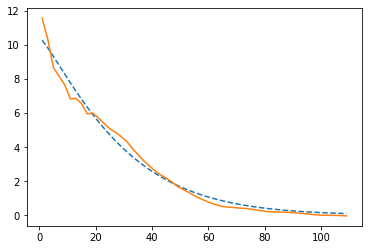

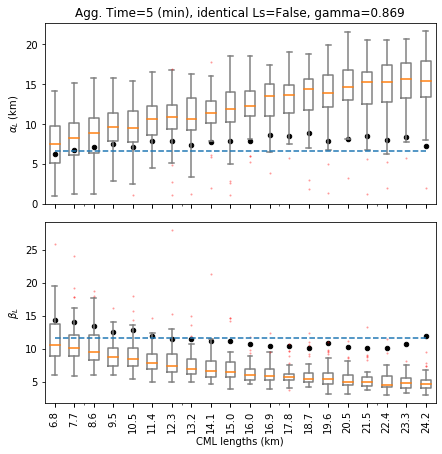

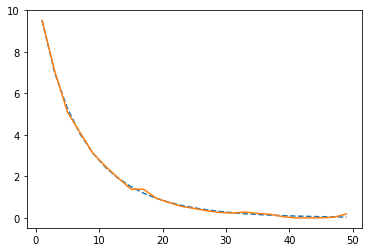

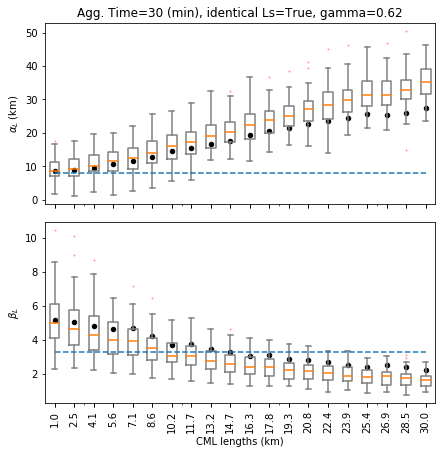

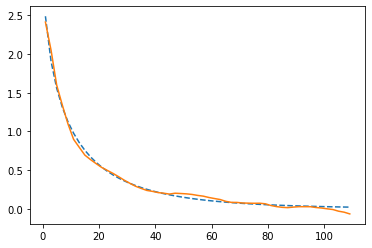

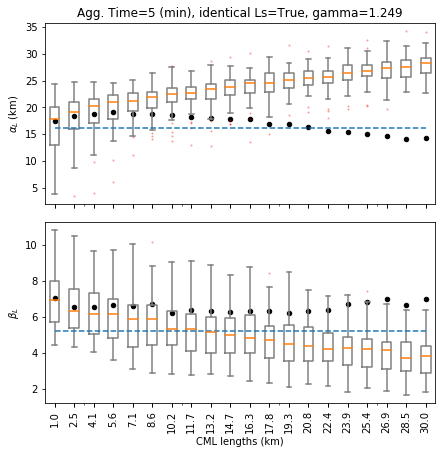

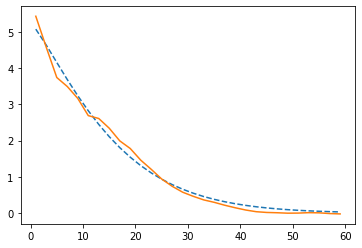

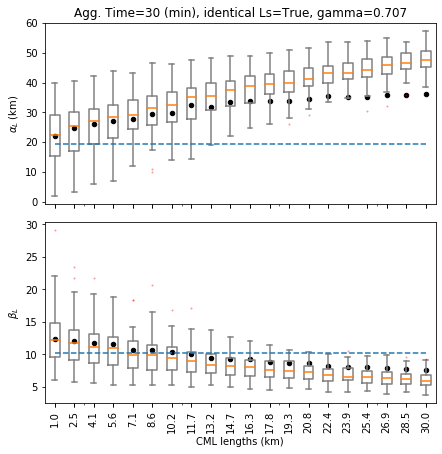

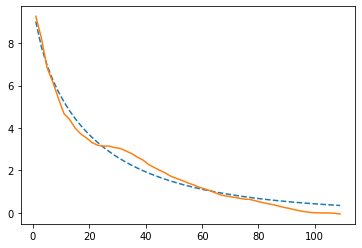

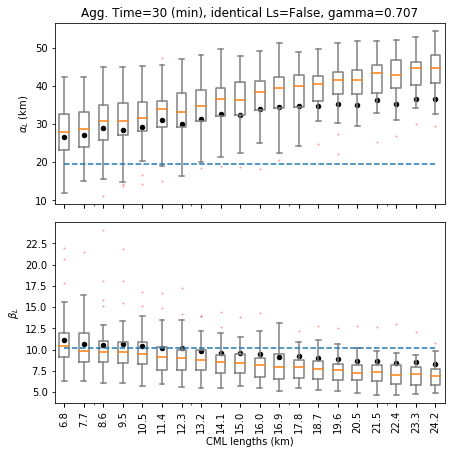

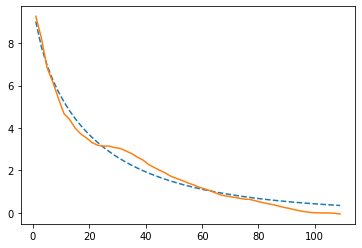

In [23]:
a = 0.24; b = 3.49;

list_of_snapshots = []
for i, dr in enumerate(dir_paths):
    sn = split_at(split_at(dr,'_',-5)[0] + \
    split_at(split_at(dr,'identical',1)[1],'_',1)[0],'/',-1)[1] +\
    'a_' + str(int(a*100)) + 'b_' + str(int(b*100))
    if sn not in list_of_snapshots:
        list_of_snapshots.append(sn)

def filter_par_arr(array):
    array[array[:,1]==888] = np.nan
    array[array[:,1]==777] = np.nan
    array[array[:,1]==666] = np.nan
    array[array[:,0] < 1e3] = np.nan
    array[array[:,1] > 600] = np.nan
    array[array[:,1] < 1e-2] = np.nan
    array[:,0] = array[:,0] / 1e3 # to make alpha units km
    return array

for i, dr in enumerate(dir_paths):
    if 'identicalFalse' in dr:
        identical = False
    else:
        identical = True
    sn = split_at(split_at(dr,'_',-5)[0] + \
    split_at(split_at(dr,'identical',1)[1],'_',1)[0],'/',-1)[1] +\
    'ab_' + str(int(a*100)) + str(int(b*100))
    if sn not in list_of_snapshots:
        list_of_snapshots.append(sn)
        
    dir_path_current = Path(dr)
#     print(dir_path_current)
    agg = split_at(split_at(dr,'/',-2)[-1],'_',1)[0]
    beta_arr = []
    alpha_arr = []
    gamma_arr = []
    l_names = []
    
    print(dr)
    for filename in sorted(os.listdir(dir_path_current)):
        if 'ac_par' in filename:
            name = split_at(filename,'.',1)[0]
            with open(dir_path_current / filename, 'rb') as f:
                arr = pkl.load(f)
            f.close()
#             print(filename)
            arr = filter_par_arr(arr)
            arr = np.array(arr)
            arr = np.delete(arr,0,0)
            l=int(split_at(name,'_',-1)[1])
#             print(l)

            beta_arr.append(arr[:,1].T)
            alpha_arr.append(arr[:,0].T)
            gamma_arr.append(arr[:,2].T)

            l_names.append(str(l * 100))
    # sill_arr = np.concatenate(sill_arr)
    beta_arr = np.array(beta_arr)
    alpha_arr = np.array(alpha_arr)
    gamma_arr = np.array(gamma_arr)
    print(np.shape(beta_arr.T))
    df_beta = pd.DataFrame(beta_arr.T,columns=l_names)
    df_alpha = pd.DataFrame(alpha_arr.T,columns=l_names)
    df_gamma = pd.DataFrame(gamma_arr.T,columns=l_names)
    
    fig, ax = plt.subplots(2,1, figsize=(7,7), sharex=True)
    flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                      linestyle='none', markeredgecolor='g')
    
    cols = df_alpha.columns.values.astype(np.float) / 1e3
    cols.astype(str)
    d = dict(zip(df_gamma.columns.values, cols))
    df_gamma.rename(columns=d,inplace=True)
    d = dict(zip(df_alpha.columns.values, cols))
    df_alpha.rename(columns=d,inplace=True)

    
    ##############################
    ##############################
    l_alpha_0 = []
    for i,L in enumerate(cols):
        alpha_0 = alpha_L_inv(
            np.array([L,df_gamma[L].median()]),
            a,
            df_alpha[L].median(),
            bias=0.0
        )
        l_alpha_0.append(alpha_0)
    l_alpha_0 = np.array(l_alpha_0)
    df_alpha_0 = pd.DataFrame(l_alpha_0)
#         print(df_alpha[L].median(), alpha_0)
    ##############################
    ##############################

    df_alpha.plot(kind='box',ax=ax[0],
                 color=dict(boxes='grey', whiskers='grey', medians='C1', caps='grey'),
                 boxprops=dict(linestyle='-', linewidth=1.5),
                 flierprops=dict(marker='o', 
                                 markerfacecolor='r', 
                                 markersize=2,
                                 linestyle='none',
                                 markeredgecolor='None', 
                                 alpha=0.4),
                 medianprops=dict(linestyle='-', linewidth=1.5),
                 whiskerprops=dict(linestyle='-', linewidth=1.5),
                 capprops=dict(linestyle='-', linewidth=1.5),
                 showfliers=True, rot=90)
    ax[0].scatter(range(1,len(cols)+1),df_alpha_0[0].values, s=20, c='k')
    
    cols = df_beta.columns.values.astype(np.float) / 1e3
    cols.astype(str)
    d = dict(zip(df_beta.columns.values, cols))
    df_beta.rename(columns=d,inplace=True)

    
    ##############################
    ##############################
    l_beta_0 = []
    for i,L in enumerate(cols):
        beta_0 = beta_L_inv(
            L,
            b,
            df_beta[L].median(),
            l_alpha_0[i]
        )
        l_beta_0.append(beta_0)
    l_beta_0 = np.array(l_beta_0)
    df_beta_0 = pd.DataFrame(l_beta_0)
#         print(df_alpha[L].median(), alpha_0)
    ##############################
    ##############################
    df_beta.plot(kind='box',ax=ax[1],
                 color=dict(boxes='grey', whiskers='grey', medians='C1', caps='grey'),
                 boxprops=dict(linestyle='-', linewidth=1.5),
                 flierprops=dict(marker='o', 
                                 markerfacecolor='r', 
                                 markersize=2,
                                 linestyle='none',
                                 markeredgecolor='None', 
                                 alpha=0.4),
                 medianprops=dict(linestyle='-', linewidth=1.5),
                 whiskerprops=dict(linestyle='-', linewidth=1.5),
                 capprops=dict(linestyle='-', linewidth=1.5),
                 showfliers=True, rot=90)
    ax[1].scatter(range(1,len(cols)+1),df_beta_0[0].values, s=20, c='k')
    
    f = open(dr + "rad_dir.txt", "r")
    for i, line in enumerate(f):
        print(line)
        rad_path_current = Path(line)
        f.close()
        break
        
    for filename in sorted(os.listdir(rad_path_current)):
        
        if 'df_radar' in filename:
            name_df = 'df_radar_' + split_at(agg,'T',1)[0] + str(identical)
            globals()[name_df] = pd.read_pickle(rad_path_current / filename)
        if '_acf.pkl' in filename:
            with open(rad_path_current / filename, 'rb') as f:
                name = 'ac_' + split_at(agg,'T',1)[0] + str(identical)
                globals()[name] = pkl.load(f)
        if 'alpha' in filename:
            with open(rad_path_current / filename, 'rb') as f:
                alpha = pkl.load(f)
                alpha = alpha / 1e3
        if 'gamma' in filename:
            with open(rad_path_current / filename, 'rb') as f:
                gamma = pkl.load(f)
        if 'beta' in filename:
            with open(rad_path_current / filename, 'rb') as f:
                beta = pkl.load(f)
        if 'hs' in filename:
            with open(rad_path_current / filename, 'rb') as f:
                hs = pkl.load(f)
        if 'nugget' in filename:
            with open(rad_path_current / filename, 'rb') as f:
                nugget = pkl.load(f)
        f.close()
    if 'alpha' not in locals():
#         import pdb; pdb.set_trace()
        alpha = np.nan; beta = np.nan;
    plt.subplots_adjust(hspace=0.1)
    ax[0].set_title('Agg. Time=%s (min), identical Ls=%s, gamma=%s' %(split_at(agg,'T',1)[0],
                                                                      str(identical),
                                                                     str(round(gamma,3))))
    ax[0].set_ylabel(r'$\alpha_L$ (km)')
    ax[1].set_ylabel(r'$\beta_L$')
    ax[1].set_xlabel('CML lengths (km)')

    line = range(1,len(cols)+1)
    ax[0].plot(line, np.ones_like(line) * alpha, '--')
#     ax[0].text(18, alpha-alpha/7, r'rad $\alpha_L$', fontsize=11, color='C0')
    ax[1].plot(line, np.ones_like(line) * beta, '--')
#     ax[1].text(18, beta+beta/12, r'rad $\beta_L$', fontsize=11, color='C0')
    fig, ax = plt.subplots()
    ax.plot(hs/1e3,acf_original_gamma(hs/1e3,alpha,beta,gamma), '--C0')
    ax.plot(hs/1e3, globals()[name]-nugget, 'C1')
    print(alpha,beta,gamma)
    del alpha,beta,rad_path_current
#     fig.savefig(str(fig_path) + '/semireal_pars_agg_' + sn + '.png', bbox_inches='tight')
#     print(dir_path_current)
#     fig.savefig(str(fig_path_current) + '/semireal_pars_agg_' + sn + '.png', bbox_inches='tight')
#     print(dir_path_current)

/home/adameshel/Documents/code/autocorr/radar_autocorr_snaps/with_gamma/30T_ts49_cod110_mult20_DzerosFalse
/home/adameshel/Documents/code/autocorr/radar_autocorr_snaps/with_gamma/30T_ts11_cod110_mult20_DzerosFalse
/home/adameshel/Documents/code/autocorr/radar_autocorr_snaps/with_gamma/5T_ts394_cod60_mult20_DzerosFalse
/home/adameshel/Documents/code/autocorr/radar_autocorr_snaps/with_gamma/30T_ts26_cod110_mult20_DzerosFalse
/home/adameshel/Documents/code/autocorr/radar_autocorr_snaps/with_gamma/30T_ts49_cod110_mult20_DzerosFalse
/home/adameshel/Documents/code/autocorr/radar_autocorr_snaps/with_gamma/5T_ts360_cod50_mult20_DzerosFalse
/home/adameshel/Documents/code/autocorr/radar_autocorr_snaps/with_gamma/30T_ts11_cod110_mult20_DzerosFalse
/home/adameshel/Documents/code/autocorr/radar_autocorr_snaps/with_gamma/5T_ts360_cod50_mult20_DzerosFalse
/home/adameshel/Documents/code/autocorr/radar_autocorr_snaps/with_gamma/30T_ts26_cod110_mult20_DzerosFalse
/home/adameshel/Documents/code/autocorr/

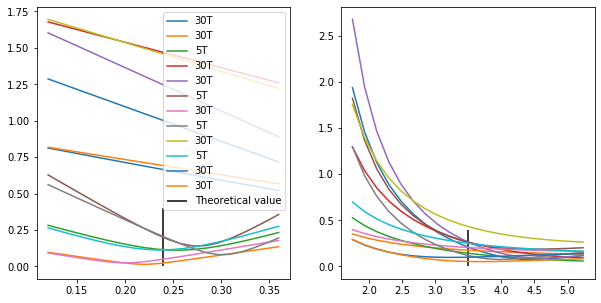

In [24]:
a_pars = np.linspace(a-a/2,a+a/2,20)
b_pars = np.linspace(b-b/2,b+b/2,20)

list_of_rmsea = []
list_of_rmseb = []

fig, ax = plt.subplots(1,2, figsize=(10,5), sharey=False)

for i, dr in enumerate(dir_paths):
    dir_path_current = Path(dr)
    agg = split_at(split_at(dr,'/',-2)[-1],'_',1)[0]
    globals()["rmsea" + agg] = []
    globals()["rmseb" + agg] = []
    list_of_rmsea.append("rmsea" + agg)
    list_of_rmseb.append("rmsea" + agg)
    beta_arr = []
    alpha_arr = []
    gamma_arr = []
    l_names = []
    #################
    f = open(dr + "rad_dir.txt", "r")
    for i, line in enumerate(f):
        print(line)
        rad_path_current = Path(line)
        f.close()
        break
        
    for filename in sorted(os.listdir(rad_path_current)):
        if 'alpha' in filename:
            with open(rad_path_current / filename, 'rb') as f:
                alpha = pkl.load(f)
                alpha = alpha / 1e3
        elif 'beta' in filename:
            with open(rad_path_current / filename, 'rb') as f:
                beta = pkl.load(f)
        elif 'hs' in filename:
            with open(rad_path_current / filename, 'rb') as f:
                hs = pkl.load(f)
        elif 'nugget' in filename:
            with open(rad_path_current / filename, 'rb') as f:
                nugget = pkl.load(f)
    for filename in sorted(os.listdir(dir_path_current)):
        if 'ac_par' in filename:
            name = split_at(filename,'.',1)[0]
            with open(dir_path_current / filename, 'rb') as f:
                arr = pkl.load(f)
            f.close()
            arr = filter_par_arr(arr)
            arr = np.array(arr)
            arr = np.delete(arr,0,0)
            l=int(split_at(name,'_',-1)[1])
#             print(l)

            beta_arr.append(arr[:,1].T)
            alpha_arr.append(arr[:,0].T)
            gamma_arr.append(arr[:,2].T)

            l_names.append(str(l * 100))
    # sill_arr = np.concatenate(sill_arr)
    beta_arr = np.array(beta_arr)
    alpha_arr = np.array(alpha_arr)
    gamma_arr = np.array(gamma_arr)

    df_beta = pd.DataFrame(beta_arr.T,columns=l_names)
    df_alpha = pd.DataFrame(alpha_arr.T,columns=l_names)
    df_gamma = pd.DataFrame(gamma_arr.T,columns=l_names)
    
#     fig, ax = plt.subplots(2,1, figsize=(7,7), sharex=True)
#     flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
#                       linestyle='none', markeredgecolor='g')
    
    cols = df_alpha.columns.values.astype(np.float) / 1e3
    cols.astype(str)
    d = dict(zip(df_gamma.columns.values, cols))
    df_gamma.rename(columns=d, inplace=True)
    d = dict(zip(df_alpha.columns.values, cols))
    df_alpha.rename(columns=d, inplace=True)
    alpha_meds = df_alpha.median()
    
    for i, a_par in enumerate(a_pars):
        l_alpha_0 = []
        for i,L in enumerate(cols):
            alpha_0 = alpha_L_inv(
                np.array([L,df_gamma[L].median()]),
                a_par,
                df_alpha[L].median(),
                bias=0.0
            )
            l_alpha_0.append(alpha_0)
        l_alpha_0 = np.array(l_alpha_0)
        df_alpha_0 = pd.DataFrame(l_alpha_0)
        globals()["rmsea" + agg].append(rmse(df_alpha_0[0],
                                            np.ones_like(cols) * alpha) / alpha)
        
    ax[0].plot(a_pars,globals()["rmsea" + agg],label=agg)
    
    
    cols = df_beta.columns.values.astype(np.float) / 1e3
    cols.astype(str)
    d = dict(zip(df_beta.columns.values, cols))
    df_beta.rename(columns=d, inplace=True)
    beta_meds = df_beta.median()

    for i, b_par in enumerate(b_pars):
        l_beta_0 = []
        for i,L in enumerate(cols):
            beta_0 = beta_L_inv(
                L,
                b_par,
                df_beta[L].median(),
                alpha
            )
            l_beta_0.append(beta_0)
        l_beta_0 = np.array(l_beta_0)
        df_beta_0 = pd.DataFrame(l_beta_0)
        globals()["rmseb" + agg].append(rmse(df_beta_0[0],
                                            np.ones_like(cols) * beta) / beta)
        bmax = np.nanmax(globals()["rmseb" + agg])
    ax[1].plot(b_pars,globals()["rmseb" + agg],label=agg)
# ax[0].set_ylim((0,8)); ax[1].set_ylim((0,8));

ax[0].vlines(a,0,0.4,label='Theoretical value')
ax[1].vlines(b,0,0.4,label='Theoretical value')
ax[0].legend()
# ax[1].legend()

#     fig.savefig(str(dir_path_current) + '/pars_agg_' + agg + '.png', bbox_inches='tight')
#     print(dir_path_current)

In [26]:
df_alpha


,1.0,2.5,4.1,5.6,7.1,8.6,10.2,11.7,13.2,14.7,16.3,17.8,19.3,20.8,22.4,23.9,25.4,26.9,28.5,30.0
0,5.456657,6.082995,6.356842,6.837859,7.108173,8.159480,8.046603,8.777661,9.691190,9.671370,12.630177,12.052918,15.341878,14.134399,18.426202,15.964624,18.793135,20.910098,16.587368,22.003682
1,14.883032,15.760368,16.287989,16.184705,16.506182,17.468682,17.523481,17.727575,19.930286,19.880495,22.160757,22.701413,22.491199,23.435771,24.846338,22.907731,24.316287,26.934862,28.485674,26.314982
2,1.051081,1.455418,2.114463,2.396684,3.953975,4.567480,5.975865,5.340711,7.206348,12.529896,11.030277,16.579070,13.623573,20.769530,17.918481,22.444295,18.641681,22.548905,28.538232,28.484523
3,12.406584,12.824787,13.531948,13.751396,13.585693,14.883652,14.891391,13.956388,15.976660,16.883769,17.328028,19.040704,16.500024,19.746748,19.573061,21.030459,21.017480,21.944647,21.611085,23.462428
4,3.225941,3.682518,3.905925,4.857819,4.481854,5.336157,5.522162,6.346064,5.969209,6.518899,7.964587,8.250110,8.620429,12.343679,10.914789,15.286983,9.064329,13.732517,13.966962,17.680649
5,9.015411,9.876873,10.587672,11.520042,13.073750,13.440839,14.201320,14.239495,15.326732,16.948159,17.837855,17.538693,19.697078,21.596112,21.620037,22.422710,23.677865,22.268025,24.412439,24.412987
6,4.945202,5.966111,6.808927,8.072218,9.500443,8.765935,11.440687,12.392484,16.828687,16.450107,16.862717,19.805284,20.335179,22.951708,23.217871,25.124155,27.709673,24.201130,24.814941,26.118837
7,NaN,1.781236,2.946088,7.301721,9.417841,8.113077,13.500328,15.172808,14.591493,24.035335,23.250453,22.688042,25.582104,28.063980,25.462785,29.783172,28.835023,28.514652,30.383045,33.656852
8,4.973006,4.293982,6.017669,8.613822,9.416580,12.241906,11.860543,14.251352,16.744040,14.784127,20.048454,17.639995,21.797135,21.603656,25.732514,26.882097,24.242552,28.531955,25.825509,25.591259
9,6.914154,7.394117,8.055243,8.280077,9.109442,9.272913,10.121494,11.057103,10.953119,11.452418,14.481077,13.088696,14.910178,15.710880,13.828766,18.080991,17.924798,18.572315,19.496376,20.073314


In [24]:
l_alpha_0 = []
for i,L in enumerate(cols):
    alpha_0 = alpha_L_inv(L,
                          0.3,
                         df_alpha[L].median())
    l_alpha_0.append(alpha_0)
    df_alpha_0 = pd.DataFrame(np.array(l_alpha_0))
    print(df_alpha[L].median(), alpha_0)

8.82324137743689 8.79324137743689
9.328162892648711 8.818162892648711
10.315894799677551 9.35589479967755
10.264763046142594 8.824763046142595
10.58579045493123 8.66579045493123
10.806869968634311 8.406869968634311
11.556931543196075 8.706931543196076
12.531018206564049 9.201018206564049
12.457985044330663 8.647985044330664
12.17205934669029 7.88205934669029
13.243523904926732 8.503523904926732
13.070189630606517 7.8501896306065175
13.485723539086681 7.785723539086681
13.290134608934107 7.110134608934106
13.501852447100532 6.871852447100532
14.206879823783787 7.096879823783787
14.36560006878571 6.77560006878571
15.6127579607599 7.542757960759902
16.281319752016646 7.761319752016647
14.709221730541705 5.709221730541705


In [27]:
df_alpha_0[0].values

array([8.79324138, 8.81816289, 9.3558948 , 8.82476305, 8.66579045,
       8.40686997, 8.70693154, 9.20101821, 8.64798504, 7.88205935,
       8.5035239 , 7.85018963, 7.78572354, 7.11013461, 6.87185245,
       7.09687982, 6.77560007, 7.54275796, 7.76131975, 5.70922173])

In [21]:
for i,L in enumerate(cols):
    alpha_0 = alpha_L_inv(L,
                          0.3,
                         df_alpha[L].median())
    print(df_alpha[L].median(), alpha_0)

8.82324137743689 8.49324137743689
9.328162892648711 8.51816289264871
10.315894799677551 9.05589479967755
10.264763046142594 8.524763046142594
10.58579045493123 8.36579045493123
10.806869968634311 8.10686996863431
11.556931543196075 8.406931543196075
12.531018206564049 8.901018206564048
12.457985044330663 8.347985044330663
12.17205934669029 7.58205934669029
13.243523904926732 8.203523904926731
13.070189630606517 7.550189630606518
13.485723539086681 7.485723539086681
13.290134608934107 6.810134608934106
13.501852447100532 6.571852447100532
14.206879823783787 6.7968798237837875
14.36560006878571 6.4756000687857105
15.6127579607599 7.242757960759902
16.281319752016646 7.461319752016647
14.709221730541705 5.409221730541705


In [21]:
nugget

9.224272582339188

In [7]:
# ## Old and working without gamma
# a = 0.25; b = 3.19;

# list_of_snapshots = []
# for i, dr in enumerate(dir_paths):
#     sn = split_at(split_at(dr,'_',-5)[0] + \
#     split_at(split_at(dr,'identical',1)[1],'_',1)[0],'/',-1)[1] +\
#     'a_' + str(int(a*100)) + 'b_' + str(int(b*100))
#     if sn not in list_of_snapshots:
#         list_of_snapshots.append(sn)

# def filter_par_arr(array):
#     array[array[:,1]==888] = np.nan
#     array[array[:,1]==777] = np.nan
#     array[array[:,1]==666] = np.nan
#     array[array[:,0] < 1e3] = np.nan
#     array[array[:,1] > 600] = np.nan
#     array[array[:,1] < 1e-2] = np.nan
#     array[:,0] = array[:,0] / 1e3 # to make alpha units km
#     return array

# for i, dr in enumerate(dir_paths):
#     if 'identicalFalse' in dr:
#         identical = False
#     else:
#         identical = True
#     sn = split_at(split_at(dr,'_',-5)[0] + \
#     split_at(split_at(dr,'identical',1)[1],'_',1)[0],'/',-1)[1] +\
#     'ab_' + str(int(a*100)) + str(int(b*100))
#     if sn not in list_of_snapshots:
#         list_of_snapshots.append(sn)
        
#     dir_path_current = Path(dr)
# #     print(dir_path_current)
#     agg = split_at(split_at(dr,'/',-2)[-1],'_',1)[0]
#     beta_arr = []
#     alpha_arr = []
#     l_names = []
    
#     print(dr)
#     for filename in sorted(os.listdir(dir_path_current)):
#         if 'ac_par' in filename:
#             name = split_at(filename,'.',1)[0]
#             with open(dir_path_current / filename, 'rb') as f:
#                 arr = pkl.load(f)
#             f.close()
# #             print(filename)
#             arr = filter_par_arr(arr)
#             arr = np.array(arr)
#             arr = np.delete(arr,0,0)
#             l=int(split_at(name,'_',-1)[1])
# #             print(l)

#             beta_arr.append(arr[:,1].T)
#             alpha_arr.append(arr[:,0].T)

#             l_names.append(str(l * 100))
#     # sill_arr = np.concatenate(sill_arr)
#     beta_arr = np.array(beta_arr)
#     alpha_arr = np.array(alpha_arr)
#     print(np.shape(beta_arr.T))
#     df_beta = pd.DataFrame(beta_arr.T,columns=l_names)
#     df_alpha = pd.DataFrame(alpha_arr.T,columns=l_names)
    
#     fig, ax = plt.subplots(2,1, figsize=(7,7), sharex=True)
#     flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
#                       linestyle='none', markeredgecolor='g')
    
#     cols = df_alpha.columns.values.astype(np.float) / 1e3
#     cols.astype(str)
#     d = dict(zip(df_alpha.columns.values, cols))
#     df_alpha.rename(columns=d,inplace=True)
    
#     ##############################
#     ##############################
#     l_alpha_0 = []
#     for i,L in enumerate(cols):
#         alpha_0 = alpha_L_inv(L,
#                               a,
#                              df_alpha[L].median(),
#                              bias=0.0)
#         l_alpha_0.append(alpha_0)
#     l_alpha_0 = np.array(l_alpha_0)
#     df_alpha_0 = pd.DataFrame(l_alpha_0)
# #         print(df_alpha[L].median(), alpha_0)
#     ##############################
#     ##############################

#     df_alpha.plot(kind='box',ax=ax[0],
#                  color=dict(boxes='grey', whiskers='grey', medians='C1', caps='grey'),
#                  boxprops=dict(linestyle='-', linewidth=1.5),
#                  flierprops=dict(marker='o', 
#                                  markerfacecolor='r', 
#                                  markersize=2,
#                                  linestyle='none',
#                                  markeredgecolor='None', 
#                                  alpha=0.4),
#                  medianprops=dict(linestyle='-', linewidth=1.5),
#                  whiskerprops=dict(linestyle='-', linewidth=1.5),
#                  capprops=dict(linestyle='-', linewidth=1.5),
#                  showfliers=True, rot=90)
#     ax[0].scatter(range(1,len(cols)+1),df_alpha_0[0].values, s=20, c='k')
    
#     cols = df_beta.columns.values.astype(np.float) / 1e3
#     cols.astype(str)
#     d = dict(zip(df_beta.columns.values, cols))
#     df_beta.rename(columns=d,inplace=True)

    
#     ##############################
#     ##############################
#     l_beta_0 = []
#     for i,L in enumerate(cols):
#         beta_0 = beta_L_inv(L,
#                           b,
#                           df_beta[L].median(),
#                           l_alpha_0[i])
#         l_beta_0.append(beta_0)
#     l_beta_0 = np.array(l_beta_0)
#     df_beta_0 = pd.DataFrame(l_beta_0)
# #         print(df_alpha[L].median(), alpha_0)
#     ##############################
#     ##############################
#     df_beta.plot(kind='box',ax=ax[1],
#                  color=dict(boxes='grey', whiskers='grey', medians='C1', caps='grey'),
#                  boxprops=dict(linestyle='-', linewidth=1.5),
#                  flierprops=dict(marker='o', 
#                                  markerfacecolor='r', 
#                                  markersize=2,
#                                  linestyle='none',
#                                  markeredgecolor='None', 
#                                  alpha=0.4),
#                  medianprops=dict(linestyle='-', linewidth=1.5),
#                  whiskerprops=dict(linestyle='-', linewidth=1.5),
#                  capprops=dict(linestyle='-', linewidth=1.5),
#                  showfliers=True, rot=90)
#     ax[1].scatter(range(1,len(cols)+1),df_beta_0[0].values, s=20, c='k')
    
#     f = open(dr + "rad_dir.txt", "r")
#     for i, line in enumerate(f):
#         print(line)
#         rad_path_current = Path(line)
#         f.close()
#         break
        
#     for filename in sorted(os.listdir(rad_path_current)):
        
#         if 'df_radar' in filename:
#             name_df = 'df_radar_' + split_at(agg,'T',1)[0] + str(identical)
#             globals()[name_df] = pd.read_pickle(rad_path_current / filename)
#         if '_acf.pkl' in filename:
#             with open(rad_path_current / filename, 'rb') as f:
#                 name = 'ac_' + split_at(agg,'T',1)[0] + str(identical)
#                 globals()[name] = pkl.load(f)
#         if 'alpha' in filename:
#             with open(rad_path_current / filename, 'rb') as f:
#                 alpha = pkl.load(f)
#                 alpha = alpha / 1e3
#         if 'beta' in filename:
#             with open(rad_path_current / filename, 'rb') as f:
#                 beta = pkl.load(f)
#         if 'hs' in filename:
#             with open(rad_path_current / filename, 'rb') as f:
#                 hs = pkl.load(f)
#         if 'nugget' in filename:
#             with open(rad_path_current / filename, 'rb') as f:
#                 nugget = pkl.load(f)
#         f.close()
#     if 'alpha' not in locals():
# #         import pdb; pdb.set_trace()
#         alpha = np.nan; beta = np.nan;
#     plt.subplots_adjust(hspace=0.1)
#     ax[0].set_title('Agg. Time=%s (min), identical Ls=%s' %(split_at(agg,'T',1)[0],str(identical)))
#     ax[0].set_ylabel(r'$\alpha_L$ (km)')
#     ax[1].set_ylabel(r'$\beta_L$')
#     ax[1].set_xlabel('CML lengths (km)')

#     line = range(1,len(cols)+1)
#     ax[0].plot(line, np.ones_like(line) * alpha, '--')
# #     ax[0].text(18, alpha-alpha/7, r'rad $\alpha_L$', fontsize=11, color='C0')
#     ax[1].plot(line, np.ones_like(line) * beta, '--')
# #     ax[1].text(18, beta+beta/12, r'rad $\beta_L$', fontsize=11, color='C0')
#     fig, ax = plt.subplots()
#     ax.plot(hs/1e3,acf_original(hs/1e3,alpha,beta), '--C0')
#     ax.plot(hs/1e3, globals()[name]-nugget, 'C1')
#     print(alpha,beta)
#     del alpha,beta,rad_path_current
# #     fig.savefig(str(fig_path) + '/pars_agg_' + sn + '.png', bbox_inches='tight')
# #     print(dir_path_current)